Hello people. My name is Stephen and i am from Greece. This is my first attempt on uploading a Kernel to Kaggle. I am new to Data Science world and i just wanted to share with you, some things i 've learned from tutorials around the web,udemy and of course other kernels on Kaggle site. Especially the Titanic one.

This kernel has some basic data info commands and much exploratory data analysis. Truth is, that creating this kernel is helping me to further understand all seaborn posibilities. It is too exciting.

Well, i am sorry about my English and i am sorry for the possible mistakes you will probably notice on my Kernel. 

#### Imports

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Data

In [2]:
pokemon = pd.read_csv('Pokemon.csv')

###### Show me the first 6 rows

In [3]:
pokemon.head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


###### List all column names

In [4]:
print(list(pokemon))

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


###### Show me the columns sum

In [5]:
print(len(list(pokemon)))

13


#### More Info

In [6]:
print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


#### Even more info

In [7]:
print(pokemon.describe())

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

#### Missing Values

In [8]:
print(pokemon.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


###### I dont really like Type 1, Type 2, Sp. Atk, Sp. Def titles. I hate space between letters. I am going to rename those.

In [9]:
pokemon.rename(columns={'Type 1': 'TypeA','Type 2':'TypeB', 'Sp. Atk':'Sp.Atk','Sp. Def':'Sp.Def'}, inplace=True)

#### I see no point having '#' Column. I am going to delete it.

In [10]:
pokemon.drop('#', axis=1,inplace=True)

#### List the sum of pokemons, grouped by their TypeA.

In [11]:
print(pokemon.groupby(['TypeA']).size())

TypeA
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64


### Visualize missing values

As seen above, there are some missing values on TypeB pokemons. There is no really point doing this, as we already know there are missing values, but i like this trick. So let's visualize it. :D

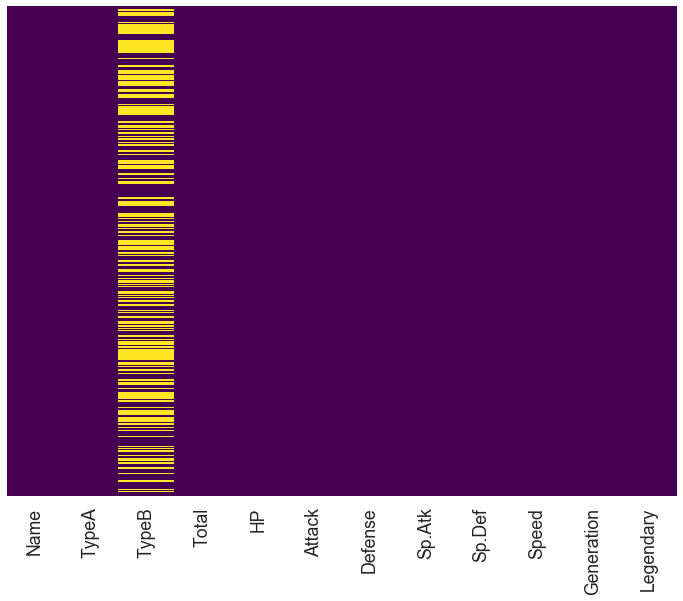

In [12]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(12,9))
sns.heatmap(pokemon.isnull(),yticklabels=False,cbar=False, cmap='viridis')

#### Let's see the amount of pokemons of each generation. We notice that 6th generation has the less amount of pokemons.

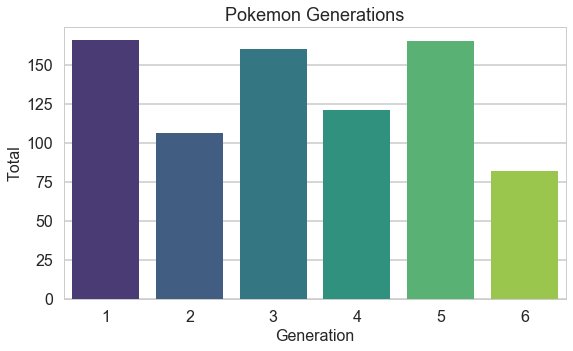

In [79]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x='Generation',data=pokemon,palette='viridis')
ax.axes.set_title("Pokemon Generations",fontsize=18)
ax.set_xlabel("Generation", fontsize=16)
ax.set_ylabel("Total", fontsize=16)

#### I believe the most critical stats of a pokemon, are attack and defense. I wanted to check if there is a correlation betwwen generations and those two stats. I see nothing clear here. It is pretty random

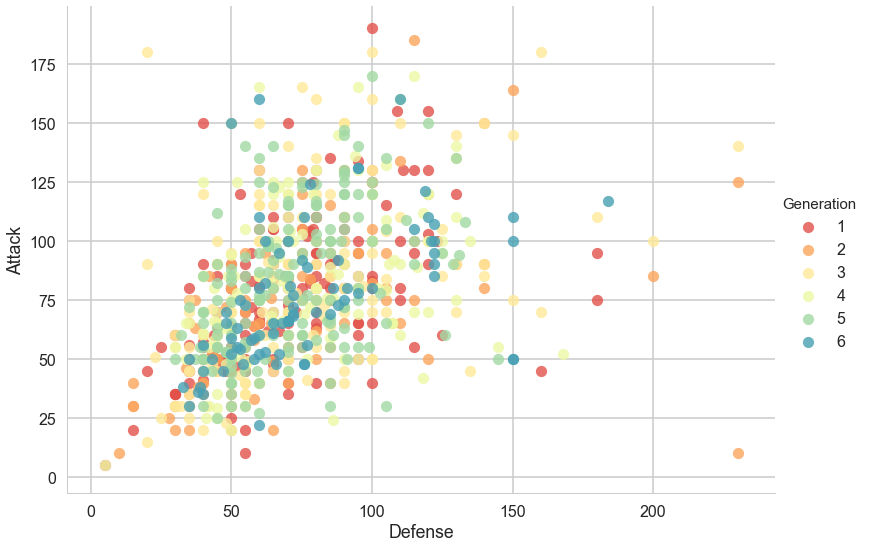

In [80]:
sns.set_style('whitegrid')
sns.lmplot('Defense','Attack',data=pokemon, hue='Generation',
           palette='Spectral',size=8,aspect=1.4,fit_reg=False)

####  Let's see the top 7 of TypeA pokemons, ordered by Total

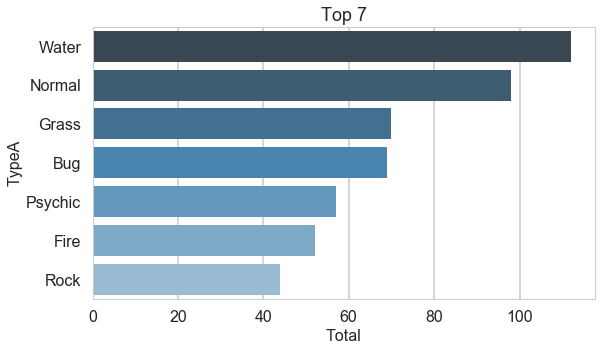

In [78]:
plt.figure(figsize=(9,5))
a = sns.countplot(y="TypeA", data=pokemon, palette="Blues_d",
              order=pokemon.TypeA.value_counts().iloc[:7].index)
a.axes.set_title("Top 7",fontsize=18)
a.set_xlabel("Total",fontsize=16)
a.set_ylabel("TypeA", fontsize=16)

#### Let's see how TypeB pokemons are divided by their type . Flying pokemons are clearly the most on our list.

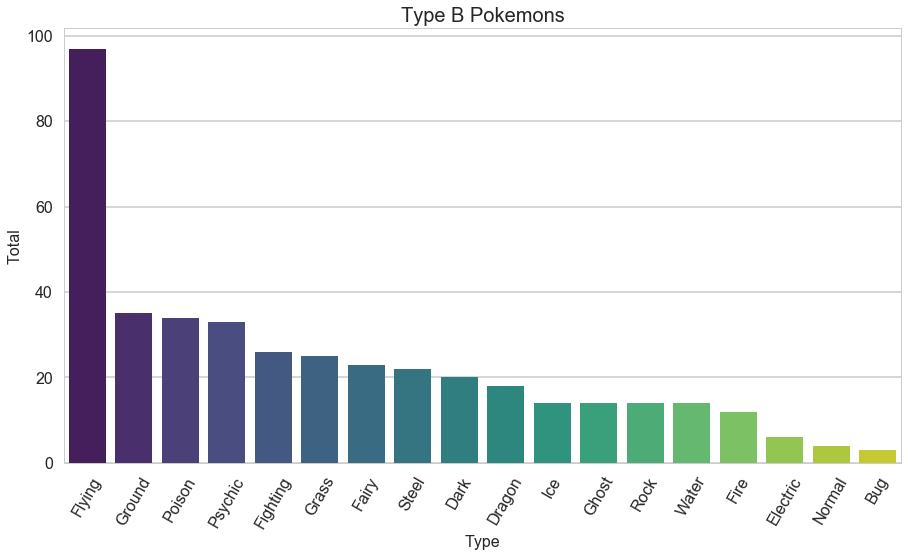

In [127]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='TypeB',data=pokemon,palette='viridis', order=pokemon.TypeB.value_counts().index)
ax.axes.set_title("Type B Pokemons",fontsize=20)
ax.set_xlabel("Type",fontsize=16)
ax.set_ylabel("Total",fontsize=16)
for item in ax.get_xticklabels():
    item.set_rotation(60)

#### I am interested on checking the distribution of all pokemons, according their total power. I admit that i was expecting to see a more normal one than this.

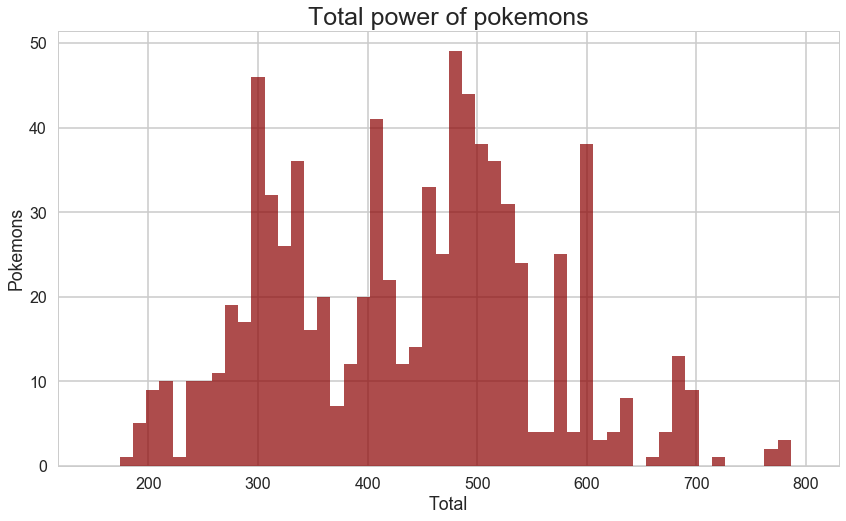

In [134]:
x = pokemon['Total']

bins = np.arange(150, 800, 12)
plt.figure(figsize=(14,8))
sns.set_context('poster')
ax = sns.distplot(x, kde=False, bins = bins, color = 'darkred',hist_kws={"alpha":0.7})
ax.axes.set_title("Total power of pokemons",fontsize=25)
ax.set_xlabel("Total")
ax.set_ylabel("Pokemons")

#### It is expected to wonder if legendary pokemon's stats are differentiated from normal ones. In this example we are going to check hit points.We see that it tends to be higher, this is kinda normal, because legendary pokemons are supposed to be stronger than normal ones.

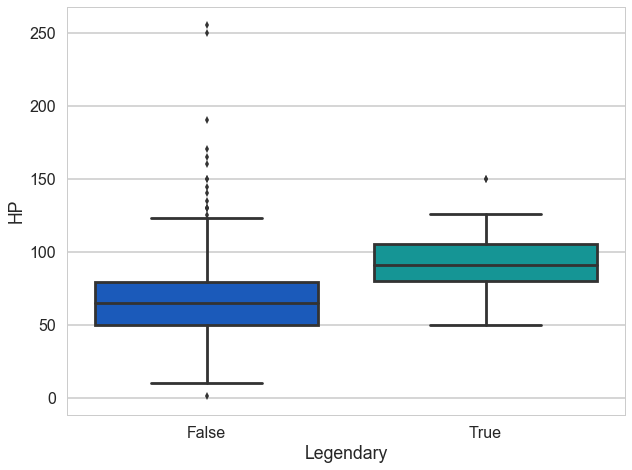

In [84]:
plt.figure(figsize=(10, 7.5))
sns.boxplot(x='Legendary',y='HP',data=pokemon,palette='winter')

#### As expected, legendary pokemons have generally much higher total points but not much more attack power. I guess their total power is raised a bit on all their stats, not only attack power.

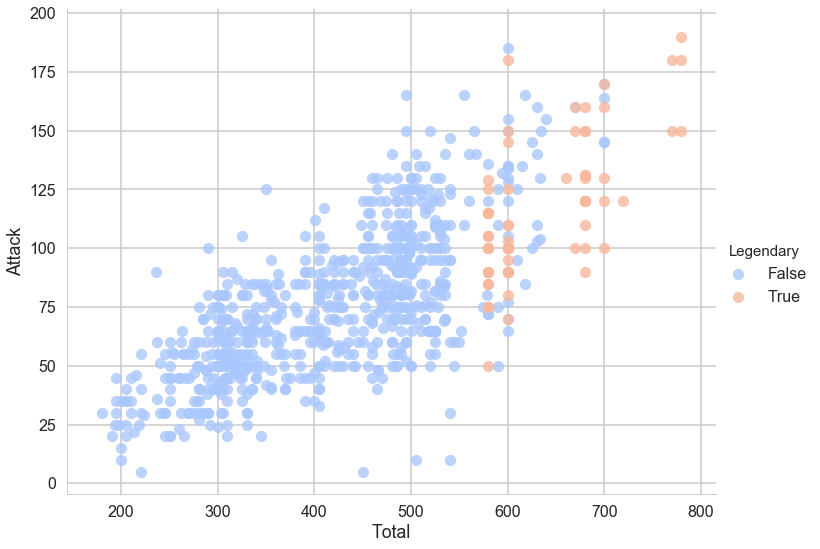

In [38]:
sns.set_style('whitegrid')
sns.lmplot('Total','Attack',data=pokemon, hue='Legendary',
           palette='coolwarm',size=8,aspect=1.3,fit_reg=False)

#### Let's see it more clear using a regplot. There is no Legednary Pokemon with less than ~580 total points.

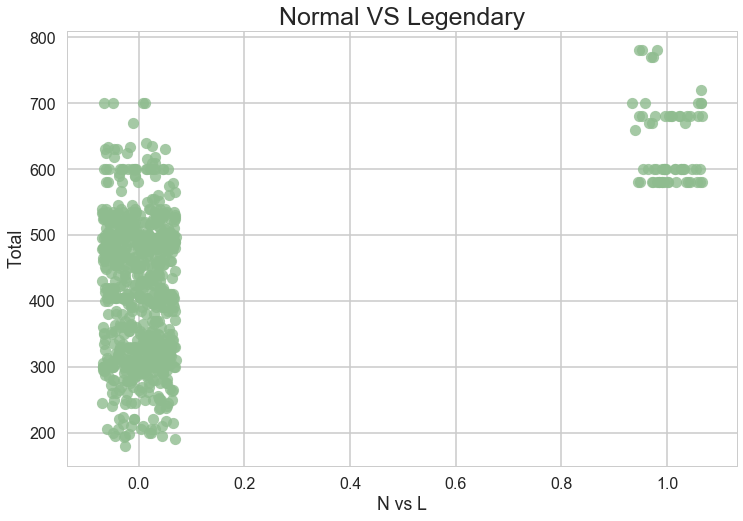

In [85]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.regplot(x="Legendary", y="Total", data=pokemon, x_jitter=.07, fit_reg=False,color="darkseagreen",)
ax.axes.set_title("Normal VS Legendary",fontsize=25)
ax.set_xlabel("N vs L")
ax.set_ylabel("Total")

#### Checking legendary vs normal pokemons specific abilities. In this case HP | Attack

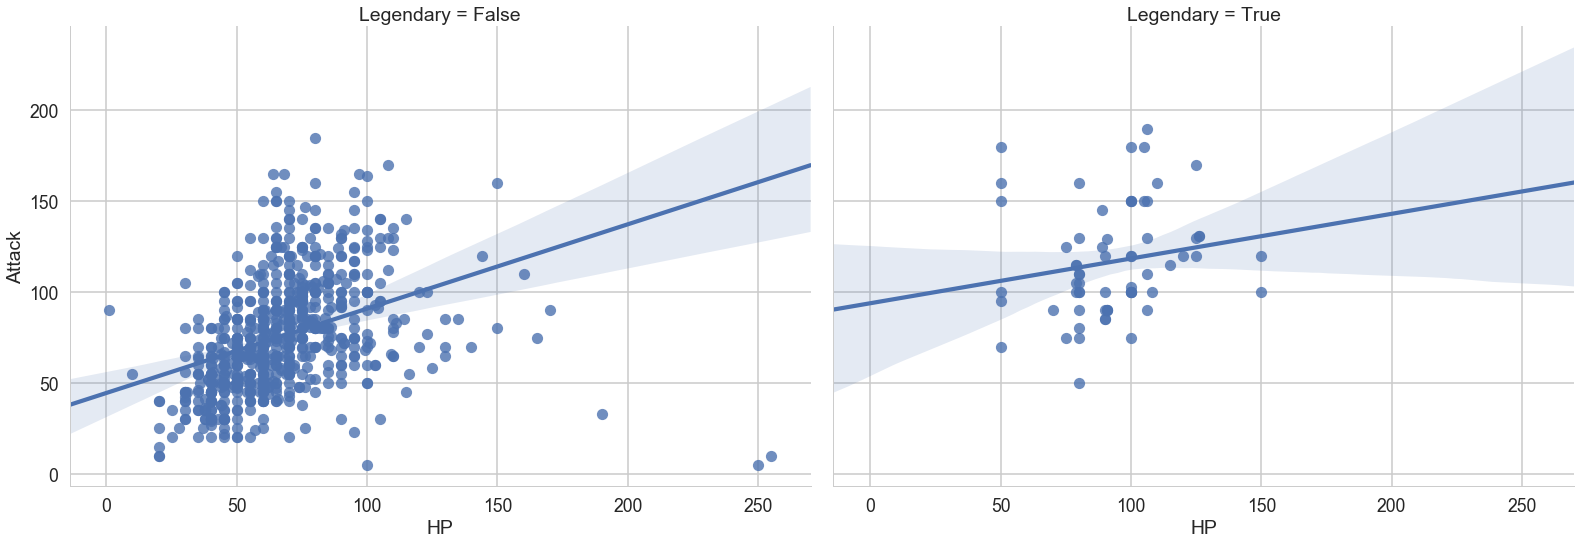

In [86]:
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.1)
sns.lmplot(x="HP", y="Attack", col="Legendary",data=pokemon,
           palette='coolwarm',size=8,aspect=1.4,fit_reg=True)

#### I was curious about the differences between pokemon generations. I wanted to check their total points, in case newer generations tend to have higher total point score, but it seems random to me.

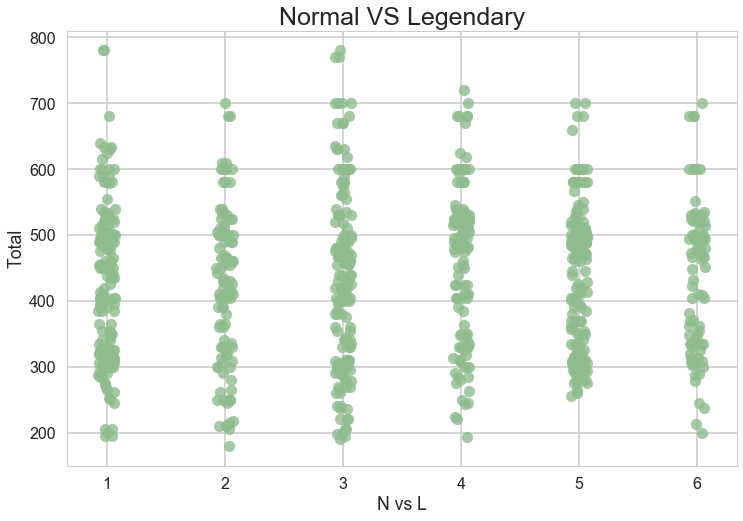

In [63]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.regplot(x="Generation", y="Total", data=pokemon, x_jitter=.07, fit_reg=False,color="darkseagreen",)
ax.axes.set_title("Normal VS Legendary",fontsize=25)
ax.set_xlabel("N vs L")
ax.set_ylabel("Total")

I am going to add more into this. Need more numbers and some machine learning on guessing if a pokemon is legendary or perhaps, guessing it's generation, although it seems to me that generation canot be easily guessed.

Anyway, CU around xD